# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [4]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [5]:
def answer_one():
    
    fraud_df = pd.read_csv('fraud_data.csv')
    fraud_numbers = fraud_df['Class'].value_counts(0)
    fraud_ratio = fraud_numbers[1]/(fraud_numbers[0]+fraud_numbers[1])
    
    
    return fraud_ratio

display(answer_one())

0.016410823768035772

In [6]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [7]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    accuracy = dummy.score(X_test, y_test)
    dummy_predicted = dummy.predict(X_test)
    recall = recall_score(y_test, dummy_predicted)
    
    
    return (accuracy, recall)

display(answer_two())


(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [8]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svc = SVC(random_state=0).fit(X_train, y_train)
    svc_predicted = svc.predict(X_test)
    svc_accuracy = svc.score(X_test, y_test)
    svc_recall = recall_score(y_test, svc_predicted)
    svc_precision = precision_score(y_test, svc_predicted)
    
    
    return (svc_accuracy, svc_recall, svc_precision)

display(answer_three())


(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [9]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svc_changed = SVC(C=10**9, gamma=10**-7).fit(X_train, y_train)
    decision = svc_changed.decision_function(X_test)
    decision = np.where(decision>-220, 1, 0)
    svc_c_predicted = svc_changed.predict(X_test)
    confusion = confusion_matrix(y_test, decision)

    
    return confusion

display(answer_four())

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [10]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc
        
    log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train).decision_function(X_test)
    precision, recall, tresholds = precision_recall_curve(y_test, log_reg)


    prec_rec = pd.DataFrame([precision, recall], index=['precision', 'recall']).T
    prec_rec = prec_rec.where(prec_rec['precision']==0.75).dropna()
    rec = prec_rec['recall'][prec_rec['recall'].index[0]]
    rec = float(rec)
    
    fpr, tpr, _ = roc_curve(y_test, log_reg)
    fpr_tpr = pd.DataFrame([fpr, tpr], index=['fpr', 'tpr']).T.round(4)

    fpr_tpr = fpr_tpr.where(fpr_tpr['fpr'] > 0.1596).dropna()

    fpr_tpr = fpr_tpr['tpr'][27]

    return rec, fpr_tpr

display(answer_five())


(0.825, 0.9375)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [16]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    reg = LogisticRegression(max_iter=100000)

    param = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}

    reg_grid = GridSearchCV(reg, param_grid=param, scoring='recall', cv=3, error_score='raise')

    reg_grid.fit(X_train, y_train)

    return reg_grid.cv_results_['mean_test_score'].reshape(-1, 2)
display(answer_six())


ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

C:\Users\henri\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\henri\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\henri\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\henri\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\henri\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1173: Fu

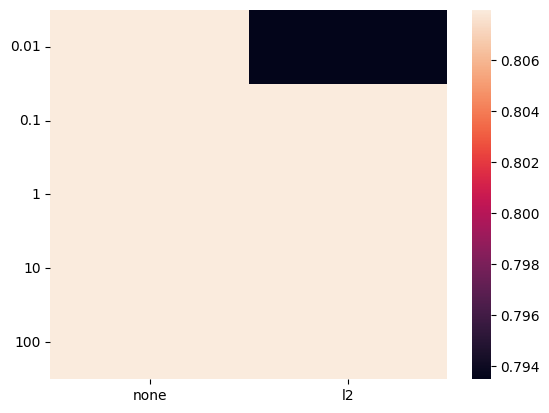

In [15]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):

    %matplotlib inline

    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['none','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0)

GridSearch_Heatmap(answer_six())